# Lab 5 Report: Bending Beams
### ENPHYS253
### Viraj Banagri
#### 2017-01-1

- Insert beam into deflection apparatus.
- Wire up the beam like in the following diagram:

<img src="./img/gauge1strain.png" width=60%>

- Measure the distance from the clamp to the center of the strain gauges (x) and to the micrometer (L).
- Measure the thickness of the beam (a). Measure the thickness at three different points and average out the data.
- Measure the width of the beam (b).  Measure the beam at three different points and average out the data.
- The data is summarized below in the following table:


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sci

beam_csv = pd.read_csv("../data/beam data.csv")
print("Table 1: Measurements of Steel Beam")
beam = beam_csv.as_matrix()
beam_csv

Table 1: Measurements of Steel Beam


,x1 [mm] +/- 0.01 mm,x2 [mm] +/- 0.01 mm,x3 [mm] +/- 0.5 mm,L [mm] +/- 0.5 mm,a (Clamped) [mm] +/- 0.01 mm,a (Center) [mm] +/- 0.01 mm,a (Free End) [mm] +/- 0.01 mm,a (Average)[mm] +/- 0.01 mm,b (Clamped) [mm] +/- 0.01 mm,b (Clamped) [mm] +/- 0.01 mm.1,b (Clamped) [mm] +/- 0.01 mm.2,b Average [mm] +/- 0.01 mm
0,25.5,101.66,175.5,255,6.26,6.23,6.42,6.3,6.26,6.32,6.42,6.3


- Deflect the beam using the micrometer and measure the $\epsilon_l$ values.

In [184]:
strain1_csv = pd.read_csv("../data/strain1 data.csv")
print("Table 2: Measurements of Steel Beam with L = 255mm +/- 0.5mm")
strain1_csv

Table 2: Measurements of Steel Beam with L = 255mm +/- 0.5mm


,Deflection [in],Gauge 1 Strain * 10^-5 +/- 0.2 * 10^-5,Gauge 2 Strain * 10^-5 +/- 0.2 * 10^-5,Gauge 3 Strain * 10^-5 +/- 0.2 * 10^-5
0,0.1,31.8,22.6,11.5
1,0.2,63.0,42.8,21.8
2,0.3,93.6,63.7,31.7
3,0.4,123.8,84.1,42.0
4,0.5,154.1,104.4,53.5


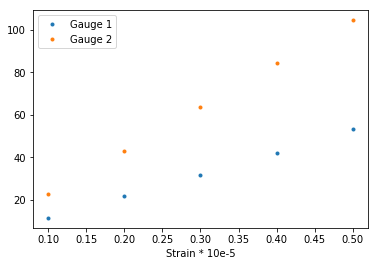

In [109]:
strain1 = strain1_csv.as_matrix()
strain1_y = strain1[:, 0]
strain1_g1 = strain1[:, 1]
strain1_g2 = strain1[:, 2]

plt.figure(1)
plt.plot(strain1_y, strain1_g1, ".", label="Gauge 1")
plt.plot(strain1_y, strain1_g2, ".", label="Gauge 2")
plt.legend()
plt.xlabel("Deflection [in]")
plt.xlabel("Strain * 10e-5")
plt.show()

- Measure L, the distance from the clamp to dimple as 286 mm +/- 0.5mm. Put variying weights on a hook attached to the dimple and measure the values strains.
- Measure $\epsilon_l$ for five weights. 

In [3]:
strain2_csv = pd.read_csv("../data/strain2 data.csv")
print("Table 3: Measurements of Steel Beam with L = 286mm +/- 0.5mm")
strain2_csv

Table 3: Measurements of Steel Beam with L = 286mm +/- 0.5mm


,Mass [g],Error in Mass [g],Gauge Strain * 10^-5 +/- 0.2 * 10^-5
0,184.87,0.2,4.9
1,685.58,0.4,15.7
2,1186.43,0.4,25.8
3,1687.14,0.6,37.1
4,2187.84,0.4,47.9


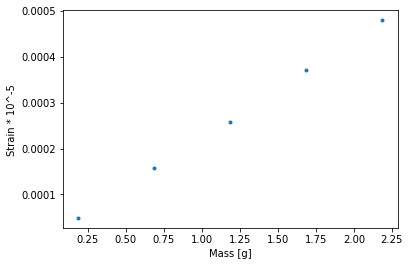

In [179]:
strain2 = strain2_csv.as_matrix()
strain2_mass = strain2[:, 0]/1000
strain2_el = strain2[:, 2] * 1e-5

plt.plot(strain2_mass, strain2_el, '.')
plt.xlabel("Mass [g]")
plt.ylabel("Strain * 10^-5")
plt.show()

el_w, intecercept = np.polyfit(strain2_mass, strain2_el, 1) # Strain divided by mass 

- Use the following equation to to find Young's modulus (Y)

$\frac{\epsilon_l}{W} = \frac{a(L-x)}{2 Y I_a} = \frac{6(L-x)}{Ya^{2}b}$

$Y = \frac{6W(L-x) }{\epsilon_l a^2 b} = 69.6 \frac{N}{m^2GPa}$

- Turn over beam
- Measure the strain on the bottom of the beam at the first gauge

In [186]:
strain3_csv = pd.read_csv("../data/strain3 data.csv")
print("Table 4: Measurements of Steel Beam with L = 255mm +/- 0.5mm")
strain3_csv

Table 4: Measurements of Steel Beam with L = 255mm +/- 0.5mm


,Deflection [in],Strain * 10^-5 +/- 0.2 *10^-5
0,0.1,34.2
1,0.2,64.0
2,0.3,91.3
3,0.4,120.8
4,0.5,150.4


In [190]:
strain4_csv = pd.read_csv("../data/strain4 data.csv")
stranin4 = strain1_csv.as_matrix()
poission, intercept = np.polyfit(stranin4[:, 1], stranin4[:, 2], 1)
strain4_csv

,Deflection [in],Top Gauge Strain * 10^-5 +/- 0.2 * 10^-5,Bottom Gauge Tension * 10^-5 +/- 0.2 * 10^-5
0,0.1,31.8,11.4
1,0.2,61.6,20.8
2,0.3,91.0,29.6
3,0.4,120.2,39.2
4,0.5,149.8,48.1


In [199]:
print("Possions ratio is {:.2f}".format(-poission/2))

Possions ratio is -0.34
